In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


[Enlace](https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn)

In [2]:
df = pd.read_csv("./Data/datosParaHacerEntrenarModelo.csv")
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
1,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
2,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
3,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
4,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9495,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9496,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9497,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9498,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


- CustomerId—contains random values and has no effect on customer leaving the bank.
- Surname—the surname of a customer has no impact on their decision to leave the bank.
- CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank. Esta tendria que ser categorica porque es un ranking cuanto mas ranking tienes más potencial es que te den el credito
- Geography—a customer’s location can affect their decision to leave the bank.
- Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
- Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- NumOfProducts—refers to the number of products that a customer has purchased through the bank.
- HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- IsActiveMember—active customers are less likely to leave the bank.
- EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- Exited—whether or not the customer left the bank. Esta es la que queremos predecir
- Complain—customer has complaint or not.
- Satisfaction Score—Score provided by the customer for their complaint resolution.
- Card Type—type of card hold by the customer.
- Points Earned—the points earned by the customer for using credit card.
- Exited Varible a predecir

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9500 entries, 0 to 9499
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          9500 non-null   int64  
 1   Surname             9500 non-null   object 
 2   CreditScore         9500 non-null   int64  
 3   Geography           9500 non-null   object 
 4   Gender              9500 non-null   object 
 5   Age                 9500 non-null   int64  
 6   Tenure              9500 non-null   int64  
 7   Balance             9500 non-null   float64
 8   NumOfProducts       9500 non-null   int64  
 9   HasCrCard           9500 non-null   int64  
 10  IsActiveMember      9500 non-null   int64  
 11  EstimatedSalary     9500 non-null   float64
 12  Exited              9500 non-null   int64  
 13  Complain            9500 non-null   int64  
 14  Satisfaction Score  9500 non-null   int64  
 15  Card Type           9500 non-null   object 
 16  Point 

In [4]:
df[df.duplicated()]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned


No hay ni nulos ni valores duplicados por lo que seguimos con el analisis

In [5]:
df["Exited"].value_counts()

0    7571
1    1929
Name: Exited, dtype: int64

In [6]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,9.500000e+03,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000
mean,1.569117e+07,650.264526,38.905895,5.011579,76358.689171,1.529053,0.706000,0.514632,100089.766615,0.203053,0.203579,3.013895,606.760842
std,7.194831e+04,96.646396,10.477895,2.894879,62333.643943,0.582492,0.455616,0.499812,57522.116171,0.402293,0.402681,1.406232,225.580770
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,1.562889e+07,584.000000,32.000000,2.750000,0.000000,1.000000,0.000000,0.000000,50781.767500,0.000000,0.000000,2.000000,411.000000
50%,1.569098e+07,652.000000,37.000000,5.000000,97070.055000,1.000000,1.000000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,1.575357e+07,717.000000,44.000000,7.250000,127477.692500,2.000000,1.000000,1.000000,149461.140000,0.000000,0.000000,4.000000,800.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


- Categoricas: 
    - CreditScore  
    - Age  
    - HasCrCard
    - IsActiveMember  
    - Complain  
    - Satisfaction Score
- Numericas:
    - Balance
    - EstimatedSalary  
    - Point Earned
    - Tenure
    - NumOfProducts  


    

### Voy a categorizar las variables que tienen mas de una categoria 

- Excellent: 800–850
- Very Good: 740–799
- Good: 670–739
- Fair: 580–669
- Poor: 300–579

In [18]:
bins = [300,579,669,739,799,850]
names = ["Poor","Fair","Good","Very Good","Excellent"]
df["CreditScoreCategorizada"]= pd.cut(df["CreditScore"],bins,labels=names)

- 18-25
- 26-35
- 35-45
- 45-65
- 65

In [19]:
bins = [17,25,35,45,65,df["Age"].max()]
names = ["Jovenes","Jovenes-Adultos","Adultos","Adultos-Mayores","Mayores"]
df["AgeCategorizada"]= pd.cut(df["Age"],bins,labels=names)

In [20]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,CreditScoreCategorizada,AgeCategorizada
0,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,Fair,Adultos
1,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,Poor,Adultos
2,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,Good,Adultos
3,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,Excellent,Adultos
4,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484,Fair,Adultos


### Vamos a estudiar las variables Numericas

In [21]:
columnasNumericas = df[["Balance","EstimatedSalary","Point Earned","Tenure","NumOfProducts"]]
columnasNumericas=list(columnasNumericas.columns)
columnasNumericas

['Balance', 'EstimatedSalary', 'Point Earned', 'Tenure', 'NumOfProducts']

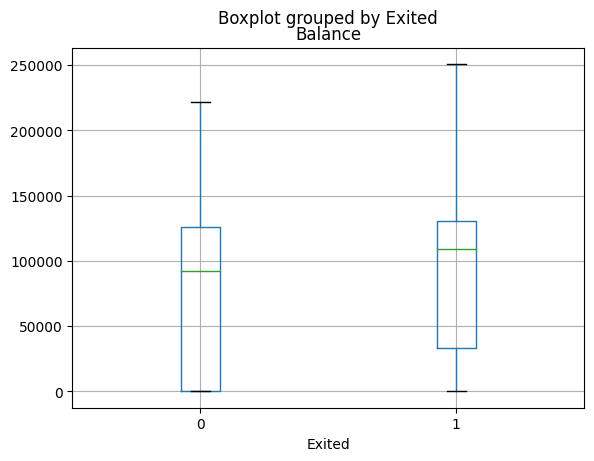

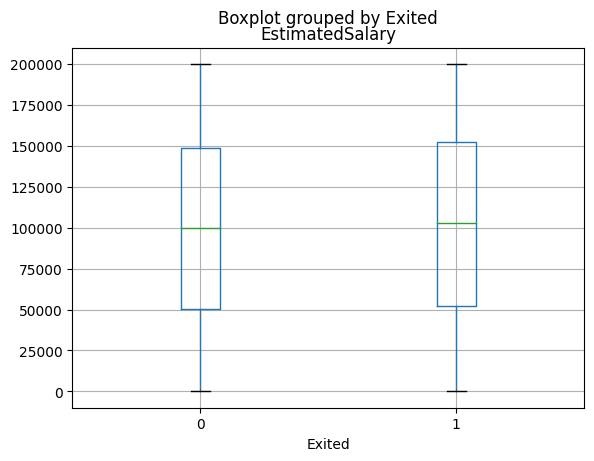

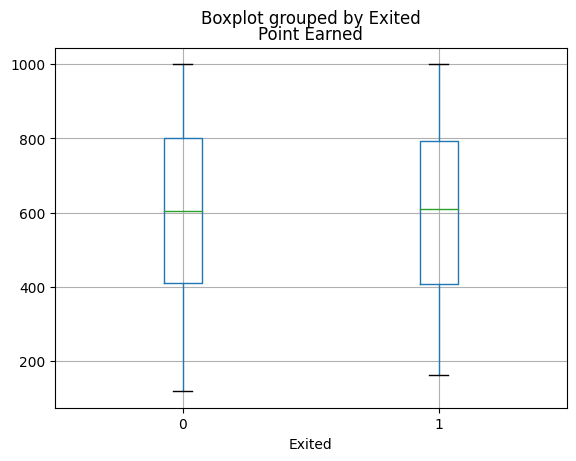

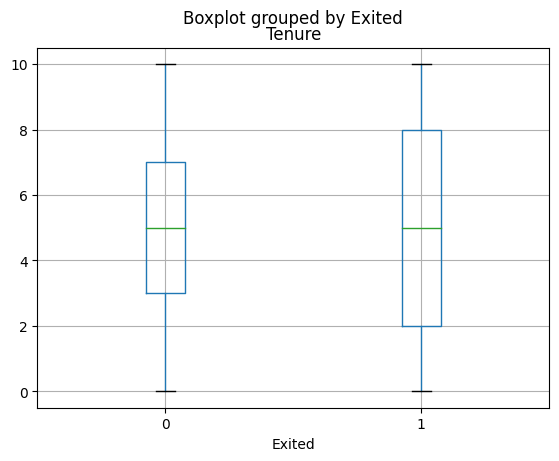

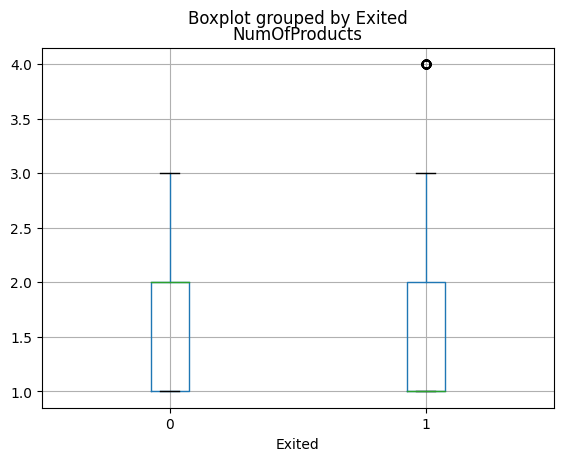

In [22]:
for columna in columnasNumericas:
    grafico = df[[columna,"Exited"]]
    grafico.boxplot(column=columna, by="Exited")

### Vamos a estudiar las variables categoricas

In [23]:
variablesCategoricas = df.select_dtypes(include=["object","category"])
variablesCategoricas = list(variablesCategoricas.columns)
variablesCategoricas


['Surname',
 'Geography',
 'Gender',
 'Card Type',
 'CreditScoreCategorizada',
 'AgeCategorizada']

In [24]:
variablesCategoricasAñadir = ["HasCrCard","IsActiveMember","Complain","Satisfaction Score"]
variablesCategoricasAñadir

['HasCrCard', 'IsActiveMember', 'Complain', 'Satisfaction Score']

In [25]:
variablesCategoricas.extend(variablesCategoricasAñadir)
variablesCategoricas
variablesCategoricas=variablesCategoricas[1:]
variablesCategoricas

['Geography',
 'Gender',
 'Card Type',
 'CreditScoreCategorizada',
 'AgeCategorizada',
 'HasCrCard',
 'IsActiveMember',
 'Complain',
 'Satisfaction Score']

In [26]:
dfVariablesCategoricas = df[variablesCategoricas]
dfVariablesCategoricas

,Geography,Gender,Card Type,CreditScoreCategorizada,AgeCategorizada,HasCrCard,IsActiveMember,Complain,Satisfaction Score
0,Spain,Female,DIAMOND,Fair,Adultos,0,1,1,3
1,France,Female,DIAMOND,Poor,Adultos,1,0,1,3
2,France,Female,GOLD,Good,Adultos,0,0,0,5
3,Spain,Female,GOLD,Excellent,Adultos,1,1,0,5
4,Spain,Male,DIAMOND,Fair,Adultos,1,0,1,5
...,...,...,...,...,...,...,...,...,...
9495,France,Male,DIAMOND,Very Good,Adultos,1,0,0,1
9496,France,Male,PLATINUM,Poor,Jovenes-Adultos,1,1,0,5
9497,France,Female,SILVER,Good,Adultos,0,1,1,3
9498,Germany,Male,GOLD,Very Good,Adultos,1,0,1,2


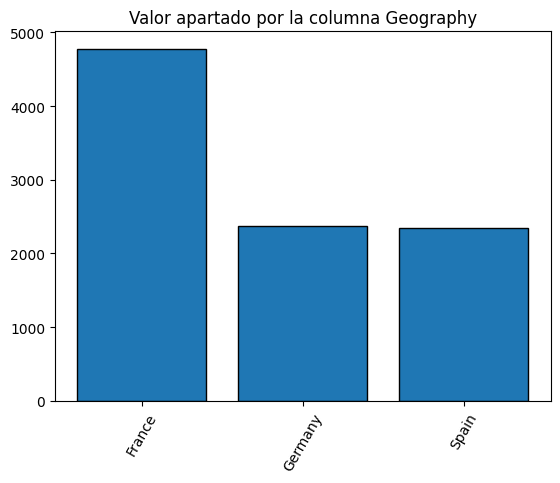

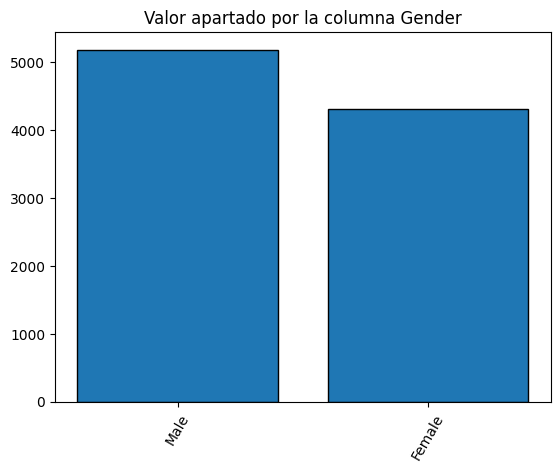

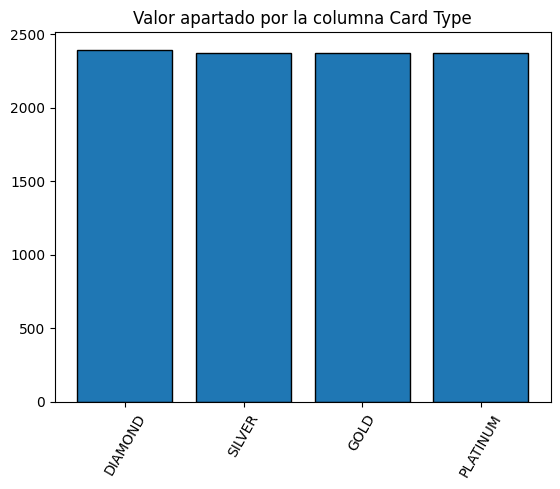

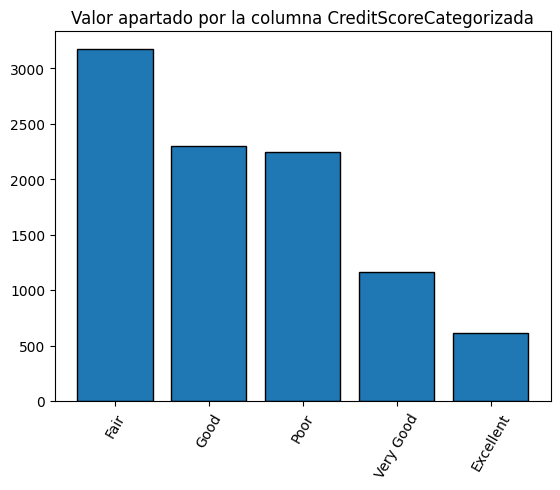

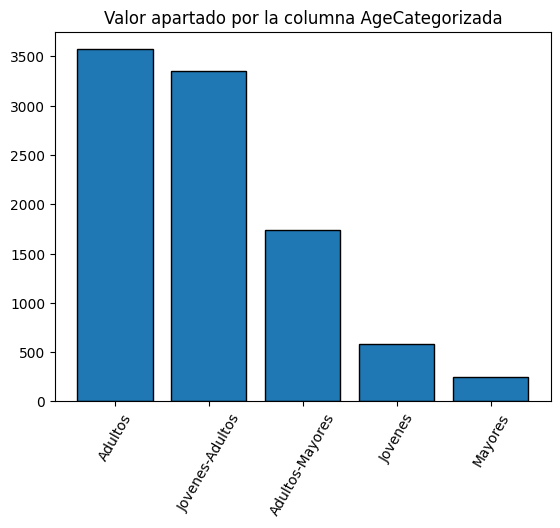

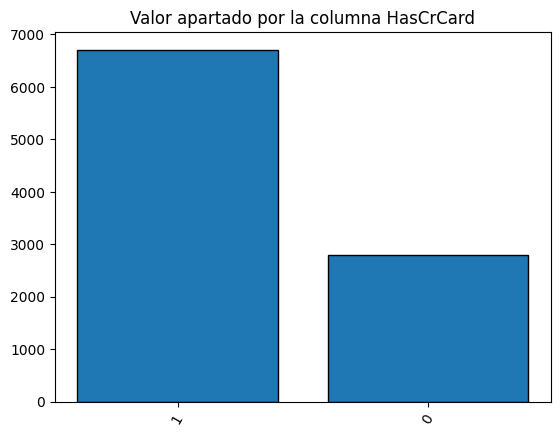

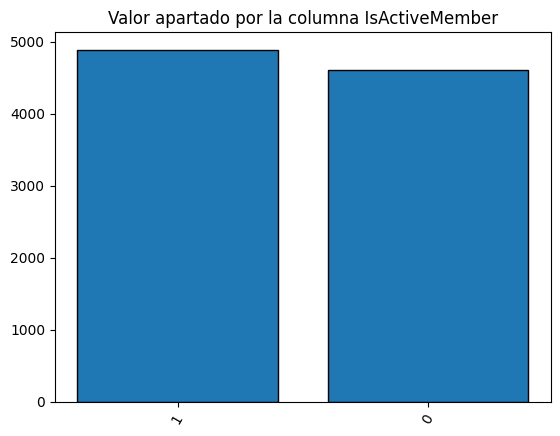

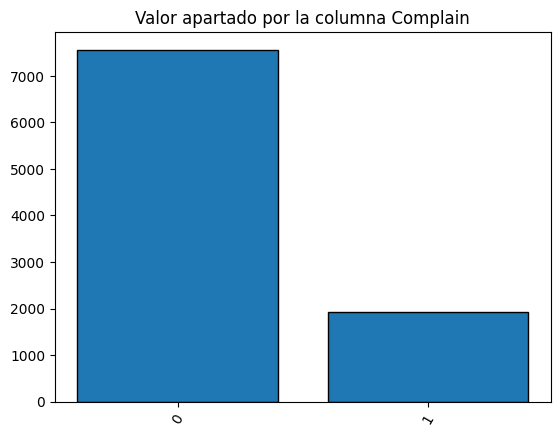

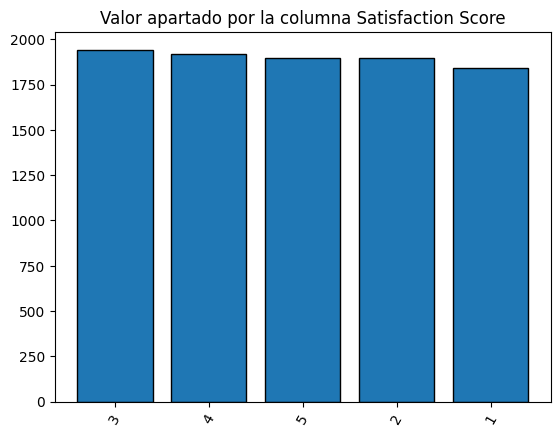

In [27]:
for columnas in dfVariablesCategoricas:
    valorTipo = dfVariablesCategoricas[columnas].value_counts().values
    etiquetas = dfVariablesCategoricas[columnas].value_counts().index
    plt.bar(range(len(etiquetas)),valorTipo, edgecolor ="black")
    plt.xticks(range(len(etiquetas)),etiquetas,rotation=60)
    plt.title(f"Valor apartado por la columna {columnas}")
    plt.show()

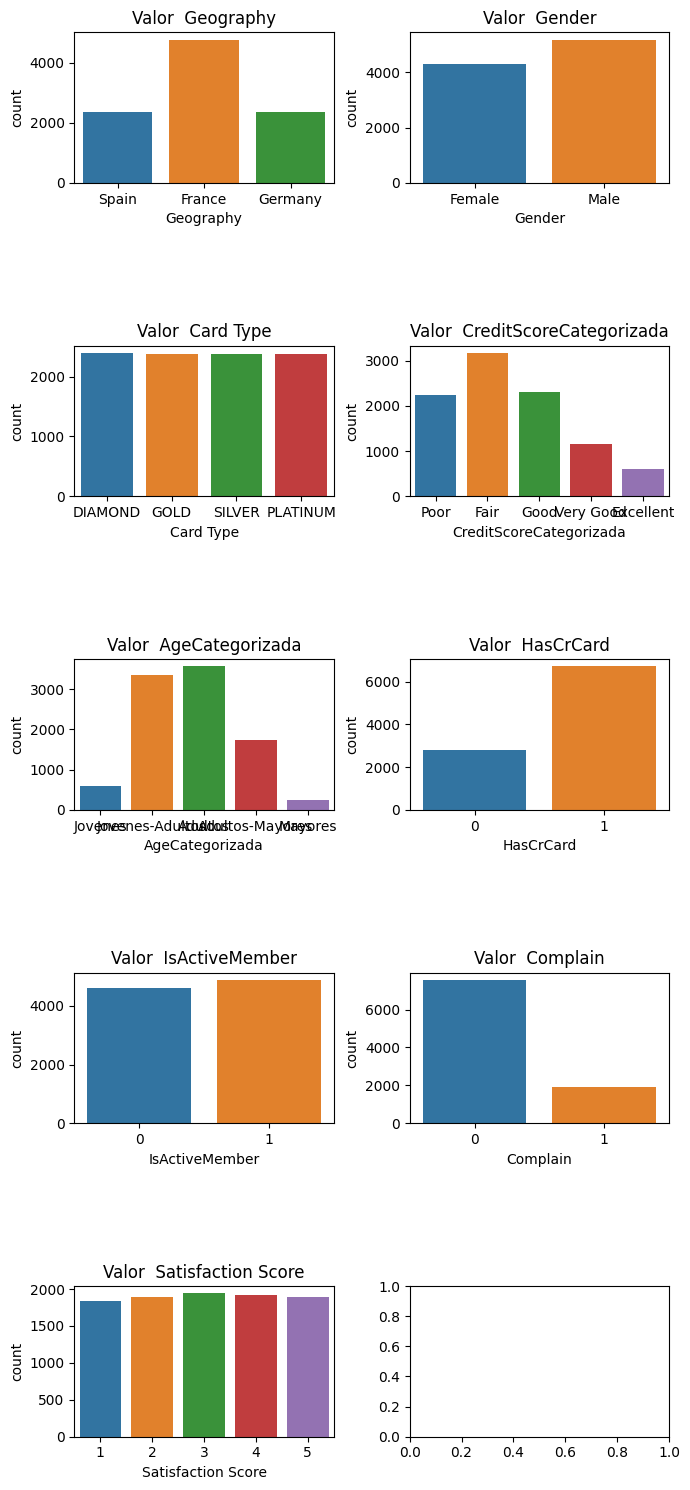

In [29]:
fig,axs = plt.subplots(ncols=2,nrows=5,figsize=(7,15))
counter = 0
axs = axs.flatten()
for columnas in dfVariablesCategoricas:
    sns.countplot(data=dfVariablesCategoricas, x=columnas, ax = axs[counter])
    axs[counter].set_title(f"Valor  {columnas}")
    counter+=1
plt.tight_layout( w_pad=0.5, h_pad=7.0)


In [30]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,CreditScoreCategorizada,AgeCategorizada
0,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,Fair,Adultos
1,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,Poor,Adultos
2,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,Good,Adultos
3,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,Excellent,Adultos
4,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484,Fair,Adultos


In [31]:
data_crosstab = pd.crosstab(df['Exited'], 
                            df['Complain'],
                                margins = False)
print(data_crosstab)

Complain     0     1
Exited              
0         7563     8
1            3  1926


Podemos ver como la variable de complain tiene mucha importancia osea en funcion de eso se pude saber a ciencia casi perfecta si se va a quedar o irse

Voy a estudiar por la variable edad para ver si hay muchos que se van o se quedan

In [32]:
data_crosstab = pd.crosstab(df['Exited'], 
                            df['AgeCategorizada'],
                                margins = False)
print(data_crosstab)

AgeCategorizada  Jovenes  Jovenes-Adultos  Adultos  Adultos-Mayores  Mayores
Exited                                                                      
0                    539             3072     2867              876      217
1                     42              283      704              867       33


### Eliminamos las columnas que no utilizaremos como son "CustomerId","Surname","CreditScore","Age"

In [33]:
df.drop(columns=["CustomerId","Surname","CreditScore","Age"], inplace=True)

In [34]:
df.to_csv("./Data/DataFrameParaHacerModelos.csv",index=False)